# Toy Ensemble Model

In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm import tqdm_notebook

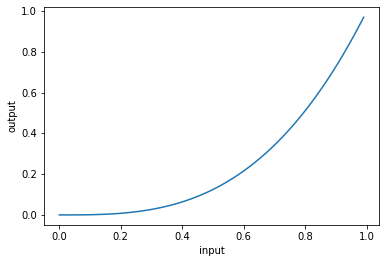

In [14]:
inputs = np.arange(0,1,0.01)
outputs = inputs ** 3
plt.plot(inputs,outputs)
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [15]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__();
    self.fc1 = nn.Linear(1, 20)
    self.fc2 = nn.Linear(20, 50)
    self.fc3 = nn.Linear(50, 1)
  def forward (self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [12]:
nets = []
for i in range(5):
  nets.append( Net() )

In [17]:
In = torch.from_numpy(inputs).float().reshape(-1,1)
tensorOutput = torch.from_numpy(outputs).float().reshape(-1,1)
target = outputs
outs = []

In [19]:
for net in nets:
  criterion = nn.MSELoss()
  optimizer = optim.Adam(net.parameters())
  epochs = tqdm_notebook(range(1000))
  for epoch in epochs:
    optimizer.zero_grad()  
    Out = net(In)
    loss = criterion(Out, tensorOutput)
    loss.backward()
    optimizer.step() 
    epochs.set_description(str(loss.data.item()))
  outs.append(Out)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [32]:
predictions = []
for i in range(len(outs[0])):
  prediction = 0
  for n in range(5):
    prediction += outs[n][i]
  predictions.append(prediction / 5)
print(predictions)

[tensor([-0.0091], grad_fn=<DivBackward0>), tensor([-0.0083], grad_fn=<DivBackward0>), tensor([-0.0075], grad_fn=<DivBackward0>), tensor([-0.0065], grad_fn=<DivBackward0>), tensor([-0.0055], grad_fn=<DivBackward0>), tensor([-0.0045], grad_fn=<DivBackward0>), tensor([-0.0035], grad_fn=<DivBackward0>), tensor([-0.0025], grad_fn=<DivBackward0>), tensor([-0.0015], grad_fn=<DivBackward0>), tensor([-0.0005], grad_fn=<DivBackward0>), tensor([0.0006], grad_fn=<DivBackward0>), tensor([0.0016], grad_fn=<DivBackward0>), tensor([0.0026], grad_fn=<DivBackward0>), tensor([0.0036], grad_fn=<DivBackward0>), tensor([0.0046], grad_fn=<DivBackward0>), tensor([0.0056], grad_fn=<DivBackward0>), tensor([0.0066], grad_fn=<DivBackward0>), tensor([0.0076], grad_fn=<DivBackward0>), tensor([0.0088], grad_fn=<DivBackward0>), tensor([0.0099], grad_fn=<DivBackward0>), tensor([0.0111], grad_fn=<DivBackward0>), tensor([0.0123], grad_fn=<DivBackward0>), tensor([0.0134], grad_fn=<DivBackward0>), tensor([0.0151], grad_f

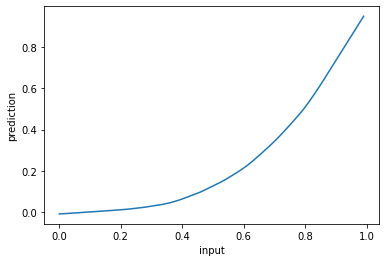

In [37]:
finalOut = np.array(predictions) 
plt.plot(inputs,finalOut)
plt.xlabel('input')
plt.ylabel('prediction')
plt.show()